In [1]:
#Bibliotecas
import h5py
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from tqdm import tqdm

from utiles import spike_reducer
#spike_recuder
import umap
import umap.plot
from umap import UMAP

##Generar un archivo PKL
import pickle 

In [7]:
path_file = "E:\\ExpRecientes\\PRK20220816s01_SPK.h5"
file = h5py.File(path_file)
#['Data']['Recording_0']['SegmentStream']['Stream_0']
Segments = file['Data']['Recording_0']['SegmentStream']['Stream_0']
keys = list(Segments.keys())

keys_segments = []
for i in range(0, len(keys)):
    if "SegmentData" in keys[i] and not("ts" in keys[i]) and (Segments[keys[i]].shape[1] >= 100):
        keys_segments.append(keys[i])
        print("{} : {} --> {}".format(i, keys[i], Segments[keys[i]].shape[1]))
print("Número de segmentos detectados: {}".format(len(keys_segments)))

2 : SegmentData_100 --> 306
5 : SegmentData_103 --> 117
6 : SegmentData_104 --> 163
7 : SegmentData_105 --> 251
10 : SegmentData_108 --> 229
13 : SegmentData_110 --> 120
22 : SegmentData_14 --> 219
24 : SegmentData_16 --> 1252
25 : SegmentData_17 --> 164
28 : SegmentData_22 --> 137
30 : SegmentData_25 --> 235
34 : SegmentData_30 --> 101
35 : SegmentData_31 --> 620
39 : SegmentData_36 --> 167755
40 : SegmentData_37 --> 142
41 : SegmentData_38 --> 347
42 : SegmentData_39 --> 145
44 : SegmentData_40 --> 106
46 : SegmentData_42 --> 121258
49 : SegmentData_45 --> 147
50 : SegmentData_46 --> 124331
51 : SegmentData_48 --> 166
52 : SegmentData_49 --> 202
61 : SegmentData_57 --> 5105
70 : SegmentData_67 --> 40040
73 : SegmentData_7 --> 294
85 : SegmentData_82 --> 172
87 : SegmentData_84 --> 312
89 : SegmentData_86 --> 267
93 : SegmentData_90 --> 17791
96 : SegmentData_93 --> 126
98 : SegmentData_95 --> 881
99 : SegmentData_96 --> 175
100 : SegmentData_97 --> 216
101 : SegmentData_98 --> 136
10

In [3]:
underscore =keys_segments[0].index('_')
electrode = keys_segments[0][underscore+1:]
print("e{}: {}".format(electrode, keys_segments[0]))

e1: SegmentData_1


In [8]:
'''Código para graficar todos las spikes por electrodo'''
'''plt.figure(figsize=(15,6))
for conde in tqdm(range(0, len(keys_segments)), desc ="SpikeData progress ..."):
    underscore =keys_segments[conde].index('_')
    electrode = int(keys_segments[conde][underscore+1:])
    plt.plot(Segments[keys_segments[conde]])
    plt.title("Sipke Data: e{} {}".format(119-electrode,keys_segments[conde]))
    plt.savefig("E:\\ExpRecientes\\SpikesPlots\\e"+str(119-electrode)+keys_segments[conde]+".png")
    plt.clf()
plt.show()'''

'plt.figure(figsize=(15,6))\nfor conde in tqdm(range(0, len(keys_segments)), desc ="SpikeData progress ..."):\n    underscore =keys_segments[conde].index(\'_\')\n    electrode = int(keys_segments[conde][underscore+1:])\n    plt.plot(Segments[keys_segments[conde]])\n    plt.title("Sipke Data: e{} {}".format(119-electrode,keys_segments[conde]))\n    plt.savefig("E:\\ExpRecientes\\SpikesPlots\\e"+str(119-electrode)+keys_segments[conde]+".png")\n    plt.clf()\nplt.show()'

# Timestamps

In [5]:
'''Electrodos con mas de 100 spikes'''
keys_ts = []
for i in range(0, len(keys)):
    if "SegmentData_ts" in keys[i] and (Segments[keys[i]].shape[1] >= 100):
        keys_ts.append(keys[i])
        print("{} : {} --> {}".format(i, keys[i], Segments[keys[i]].shape[1]))
print("Número de segmentos detectados: {}".format(len(keys_ts)))

104 : SegmentData_ts_100 --> 306
107 : SegmentData_ts_103 --> 117
108 : SegmentData_ts_104 --> 163
109 : SegmentData_ts_105 --> 251
112 : SegmentData_ts_108 --> 229
115 : SegmentData_ts_110 --> 120
124 : SegmentData_ts_14 --> 219
126 : SegmentData_ts_16 --> 1252
127 : SegmentData_ts_17 --> 164
130 : SegmentData_ts_22 --> 137
132 : SegmentData_ts_25 --> 235
136 : SegmentData_ts_30 --> 101
137 : SegmentData_ts_31 --> 620
141 : SegmentData_ts_36 --> 167755
142 : SegmentData_ts_37 --> 142
143 : SegmentData_ts_38 --> 347
144 : SegmentData_ts_39 --> 145
146 : SegmentData_ts_40 --> 106
148 : SegmentData_ts_42 --> 121258
151 : SegmentData_ts_45 --> 147
152 : SegmentData_ts_46 --> 124331
153 : SegmentData_ts_48 --> 166
154 : SegmentData_ts_49 --> 202
163 : SegmentData_ts_57 --> 5105
172 : SegmentData_ts_67 --> 40040
175 : SegmentData_ts_7 --> 294
187 : SegmentData_ts_82 --> 172
189 : SegmentData_ts_84 --> 312
191 : SegmentData_ts_86 --> 267
195 : SegmentData_ts_90 --> 17791
198 : SegmentData_ts

In [13]:
for i in range (0, len(keys_segments)):
    print("{:<2}: {:<16} {:<18} size : {}, {}".format(i, 
                                                   keys_segments[i], 
                                                   keys_ts[i],
                                                   Segments[keys_segments[i]].shape[1],
                                                   Segments[keys_ts[i]].shape[1]))

0 : SegmentData_100  SegmentData_ts_100 size : 306, 306
1 : SegmentData_103  SegmentData_ts_103 size : 117, 117
2 : SegmentData_104  SegmentData_ts_104 size : 163, 163
3 : SegmentData_105  SegmentData_ts_105 size : 251, 251
4 : SegmentData_108  SegmentData_ts_108 size : 229, 229
5 : SegmentData_110  SegmentData_ts_110 size : 120, 120
6 : SegmentData_14   SegmentData_ts_14  size : 219, 219
7 : SegmentData_16   SegmentData_ts_16  size : 1252, 1252
8 : SegmentData_17   SegmentData_ts_17  size : 164, 164
9 : SegmentData_22   SegmentData_ts_22  size : 137, 137
10: SegmentData_25   SegmentData_ts_25  size : 235, 235
11: SegmentData_30   SegmentData_ts_30  size : 101, 101
12: SegmentData_31   SegmentData_ts_31  size : 620, 620
13: SegmentData_36   SegmentData_ts_36  size : 167755, 167755
14: SegmentData_37   SegmentData_ts_37  size : 142, 142
15: SegmentData_38   SegmentData_ts_38  size : 347, 347
16: SegmentData_39   SegmentData_ts_39  size : 145, 145
17: SegmentData_40   SegmentData_ts_40  

In [34]:
#Crear un diccionario 
'''keys = SegmentData_#
   values = list [np.spikes, np.ts, #]'''

#empty diccionary
experiment = {}


# np.array(Segments[keys_segments[i]]).T--> spike profile
# np.array(Segments[keys_ts[i]]).T

for i in range (0, len(keys_segments)):
    underscore = keys_segments[i].index('_')
    num_seg = int(keys_segments[i][underscore+1:])
    experiment[keys_segments[i]] = [np.array(Segments[keys_segments[i]]).T,
                                    np.array(Segments[keys_ts[i]]).T,
                                    num_seg]

# Escritura en modo binario, vacía el fichero si existe
name_pckl = 'E:\\ExpRecientes\\PRK20220816s01_SPK.pckl'
pckl_file = open(name_pckl,'wb')
# Escribe la colección en el fichero 
pickle.dump(experiment, pckl_file) 
pckl_file.close()

# UMAP

In [2]:
name = 'E:\\ExpRecientes\\PRK20220816s01_SPK.pckl'
charge_pckl = open(name,'rb') 
# Charge pckl file
experiment_pckl = pickle.load(charge_pckl)
charge_pckl.close()
k_pckl = list(experiment_pckl.keys())

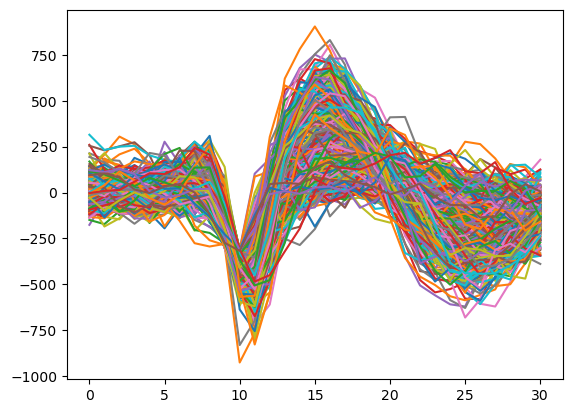

In [3]:
plt.plot(experiment_pckl[k_pckl[0]][0].T)
plt.show()

In [7]:
#index = 0
#tqdm(range(0, len(keys_segments)), desc ="SpikeData progress ..."):
for index in tqdm(range(0, len(k_pckl)), desc ="UMAP process ..."):
    if (k_pckl[index] != 'SegmentData_36') and (k_pckl[index] != 'SegmentData_42') and (k_pckl[index] != 'SegmentData_46') :
        fig, axs = plt.subplots(2, figsize=(15,15), gridspec_kw={'height_ratios': [1, 2]})

        fig.suptitle("UMAP: {}".format(k_pckl[index]))

        axs[0].plot(experiment_pckl[k_pckl[index]][0].T, linewidth=0.1, color = 'forestgreen')
        axs[0].title.set_text('Spike Profile')
        axs[0].set(ylabel='Voltage')

        reduced_spikes = spike_reducer(experiment_pckl[k_pckl[index]][0], v_neighbors = 35, random_state = 18)
        spike_embedding = reduced_spikes.embedding_
        for j in range(0, len(spike_embedding)):
            axs[1].plot(spike_embedding[j][0],spike_embedding[j][1] , marker="o", color = "dodgerblue")
        axs[1].title.set_text('Dimension Reduction')

        matplotlib.pyplot.savefig("E:\\ExpRecientes\\UMAPplots\\UMAP{}.png".format(k_pckl[index]))
        matplotlib.pyplot.close()


UMAP process ...: 100%|████████████████████████████████████████████████████████████████| 36/36 [04:29<00:00,  7.50s/it]


11.237834


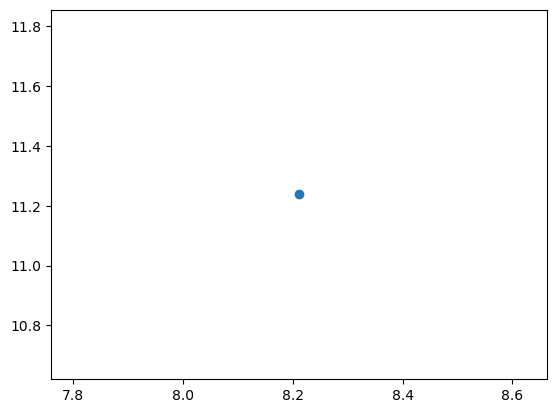

In [11]:
len(spike_embedding)
print(spike_embedding[0][1])
plt.plot(spike_embedding[0][0],spike_embedding[0][1] , marker="o")

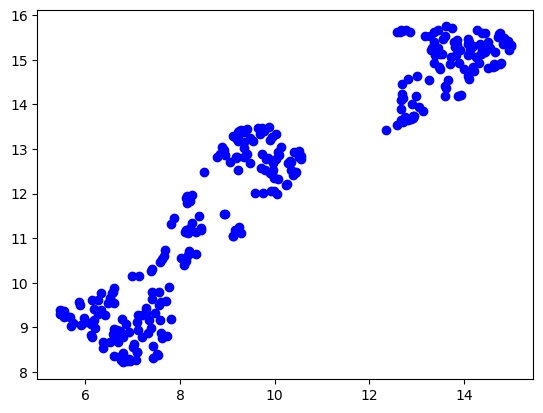

In [14]:
for i in range(0, len(spike_embedding)):
    plt.plot(spike_embedding[i][0],spike_embedding[i][1] , marker="o", color = "blue")
plt.show()